In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using Plots.PlotMeasures
using ProgressBars, JuMP, Gurobi
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer
function mon(array)
    result = Float64[]
    last = array[1]
    for elt in array
      new_last = minimum([elt, last])
      push!(result, new_last)
      last = new_last
    end
    return result
end

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-01
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-01


mon (generic function with 1 method)

In [17]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6 11 16 11],
    ThermalGen = ThermalGen
)
X0 = UT.LP_Relaxation(instance)

4-element Vector{Float64}:
 -51.0
 -55.0
 -54.25
 -53.625

In [8]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [0, 6],
    MaxRunCapacity = [15, 10],
    RampUp = [100, 100],
    RampDown = [100, 100],
    StartUp = [100, 100],
    ShutDown = [100, 100],
    UpTime = [1, 1],
    DownTime = [1, 1],
    NoLoadConsumption = [0, 0],
    MarginalCost = [10, 40],
    FixedCost = [0, 0],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 60,
    Load = [20],
    ThermalGen = ThermalGen
)
X0 = UT.LP_Relaxation(instance)

1-element Vector{Float64}:
 -40.0

In [11]:
prices = [[k] for k=-50:150]
values = Float64[]
for price in prices
    push!(values, UT.exact_oracle(instance, price)[1])
end

In [16]:
print(maximum(values))

350.0

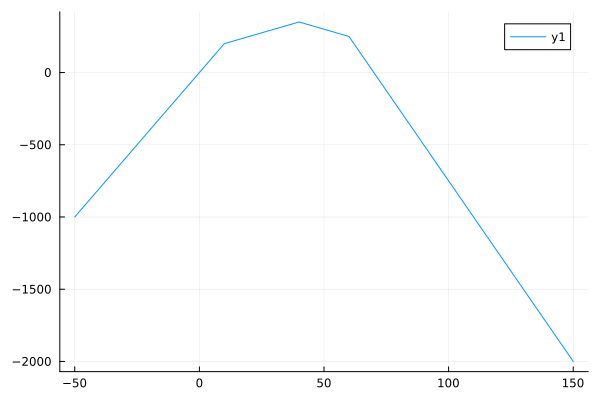

In [14]:
plot(-50:150, values)

In [18]:
XSAG, ITSAG, SAG = OPT.SAG(instance, X0, 20, 1.)
XFGM, ITFGM, FGM = OPT.FastGradientMethod(instance, X0, 20, 1., 1e-5)
XBLM, ITBLM, BLM = OPT.BundleLevelMethod(instance, X0, 20, 0.3)

([-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [[-51.0, -55.0, -54.25, -53.625], [1005.8338483146074, 1882.5287219101137, 2763.9735955056162, 1883.9037219101137], [-499.9999999999209, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404]  …  [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.661

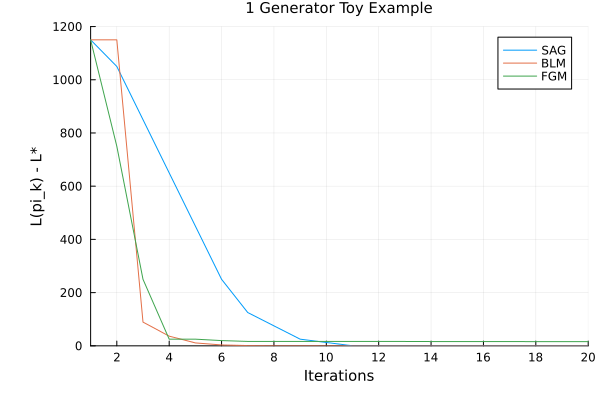

In [107]:
plot(
    title = "1 Generator Toy Example",
    xlabel = "Iterations",
    ylabel = "L(pi_k) - L*",
    xlims=(1,20),
    ylims=(0,1200),
    xticks=0:2:20,
    xscale=:identity,
    titlefontsize=10,
    labelfontsize=10,
    size=(600,400),
    bottom_margin = 15px,
    left_margin = 30px
)
plot!(mon(350 .- SAG), label = "SAG")
plot!(mon(350 .- BLM), label = "BLM")
plot!(mon(350 .- FGM), label = "FGM")